In [1]:
import sys
sys.path.append('../')

from quantumsim import *
from pennylane import numpy as np
import matplotlib.pyplot as plt

### Exacto

In [2]:
sz = np.array([[1,0],[0,-1]])
si = np.array([[1,0],[0,1]])
sx = np.array([[0,1],[1,0]])
sy = np.array([[0,-1j],[1j,0]])

h_open = -1*(np.kron(si, np.kron(sz, sz)) + np.kron(sz, np.kron(sz, si)) + np.kron(si, np.kron(sx, sx)) + np.kron(sx, np.kron(sx, si)) + np.kron(si, np.kron(sy, sy)) + np.kron(sy, np.kron(sy, si)))
ee1 = np.sort( np.linalg.eigvals(h_open) )

h_close = -1*(np.kron(si, np.kron(sz, sz)) + np.kron(sz, np.kron(sz, si)) + np.kron(si, np.kron(sx, sx)) + np.kron(sx, np.kron(sx, si)) + np.kron(si, np.kron(sy, sy)) + np.kron(sy, np.kron(sy, si))) +\
    -1*( np.kron(sz, np.kron(si, sz)) + np.kron(sx, np.kron(si, sx)) + np.kron(sy, np.kron(si, sy)) )
ee2 = np.sort( np.linalg.eigvals(h_close) )

### Variational quantum eigensolver

In [3]:
params = {
    "sites": 3,
    "spin": 0.5, 
    "pattern": "open",
    "exchange": [1,1,1]
}

spin_chain = vqe_spin(params)
spin_chain.set_group_characteristics()

In [4]:
ansatz_params = {
    "repetitions": 3,
    "base": "default.qubit",
    "backend": None,
    "interface": "autograd",
    "shots": 1000.0,
    "token": None,
    "pattern": "chain"
}

spin_chain.set_device(ansatz_params)
spin_chain.set_node(ansatz_params)

rep = ansatz_params["repetitions"]
number = (spin_chain.qubits)*rep

In [5]:
minimizate_params = {
    "type": "SLSQP",
    "maxiter": 100,
    "tol": 0.000001,
    "number": spin_chain.qubits*ansatz_params["repetitions"]}

# Ejecucion del optimizador para calcular los niveles 
# de energia

optimizer = scipy_optimizer(minimizate_params)
energy, optimum = optimizer.VQE(spin_chain.cost_function)

/Users/jnorambu/Documents/vqesimulation/env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


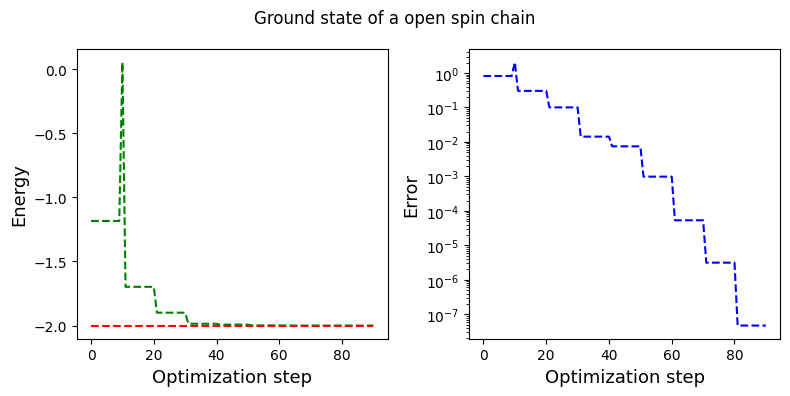

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(8,4),)
ax[0].set_xlabel("Optimization step", fontsize=13)
ax[0].set_ylabel("Energy", fontsize=13)

ax[1].set_xlabel("Optimization step", fontsize=13)
ax[1].set_ylabel("Error", fontsize=13)

fig.suptitle('Ground state of a open spin chain', fontsize=12)

ax[0].plot([i for i in range(len(energy))], energy, "g", ls="dashed")
ax[0].plot([i for i in range(len(energy))], [ee1[0] for i in range(len(energy))], "r", ls="dashed")

ax[1].plot([i for i in range(len(energy))], [np.abs(energy[i] -ee1[0]) for i in range(len(energy))], "b", ls="dashed")
ax[1].set_yscale("log")
fig.tight_layout()
plt.show()

In [7]:
params = {
    "sites": 3,
    "spin": 0.5, 
    "pattern": "close",
    "exchange": [1,1,1]
}

spin_chain = vqe_spin(params)
spin_chain.set_group_characteristics()

In [8]:
ansatz_params = {
    "repetitions": 3,
    "base": "default.qubit",
    "backend": None,
    "interface": "autograd",
    "shots": 1000.0,
    "token": None,
    "pattern": "chain"
}

spin_chain.set_device(ansatz_params)
spin_chain.set_node(ansatz_params)

rep = ansatz_params["repetitions"]
number = (spin_chain.qubits)*rep

In [9]:
minimizate_params = {
    "type": "SLSQP",
    "maxiter": 100,
    "tol": 0.000001,
    "number": spin_chain.qubits*ansatz_params["repetitions"]}

# Ejecucion del optimizador para calcular los niveles 
# de energia

optimizer = scipy_optimizer(minimizate_params)
energy, optimum = optimizer.VQE(spin_chain.cost_function)

/Users/jnorambu/Documents/vqesimulation/env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


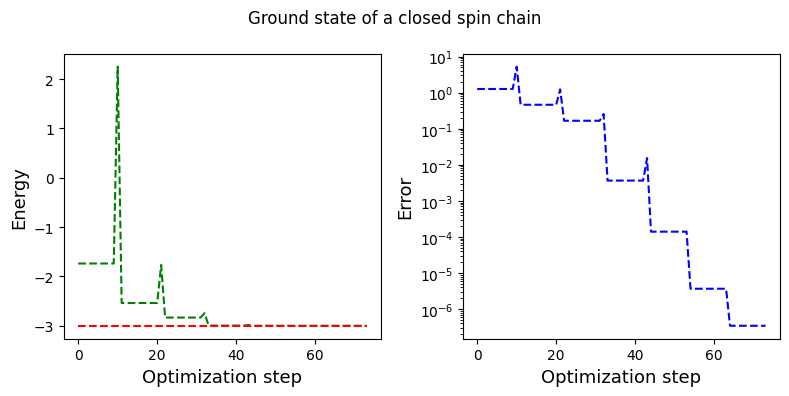

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(8,4),)
ax[0].set_xlabel("Optimization step", fontsize=13)
ax[0].set_ylabel("Energy", fontsize=13)

ax[1].set_xlabel("Optimization step", fontsize=13)
ax[1].set_ylabel("Error", fontsize=13)

fig.suptitle('Ground state of a closed spin chain', fontsize=12)

ax[0].plot([i for i in range(len(energy))], energy, "g", ls="dashed")
ax[0].plot([i for i in range(len(energy))], [ee2[0] for i in range(len(energy))], "r", ls="dashed")

ax[1].plot([i for i in range(len(energy))], [np.abs(energy[i] -ee2[0]) for i in range(len(energy))], "b", ls="dashed")
ax[1].set_yscale("log")
fig.tight_layout()
plt.show()

### Variational quantum deflation

In [3]:
params = {
    "sites": 3,
    "spin": 0.5, 
    "pattern": "open",
    "exchange": [1,1,1]
}

spin_chain = vqe_spin(params)
spin_chain.set_group_characteristics()

In [4]:
ansatz_params = {
    "repetitions": 3,
    "base": "default.qubit",
    "backend": None,
    "interface": "autograd",
    "shots": 1000.0,
    "token": None,
    "pattern": "chain"
}

spin_chain.set_device(ansatz_params)
spin_chain.set_node(ansatz_params)

rep = ansatz_params["repetitions"]
number = (spin_chain.qubits)*rep

In [5]:
minimizate_params = {
    "type": "SLSQP",
    "maxiter": 100,
    "tol": 0.000001,
    "number": spin_chain.qubits*3}

# Ejecucion del optimizador para calcular los niveles 
# de energia

optimizer = scipy_optimizer(minimizate_params)
energy, optimum2 = optimizer.VQD(spin_chain.cost_function, spin_chain.overlap_cost_function, 2**spin_chain.qubits)

state  1
state  2
state  3
state  4
state  5
state  6
state  7
state  8


/Users/jnorambu/Documents/vqesimulation/env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


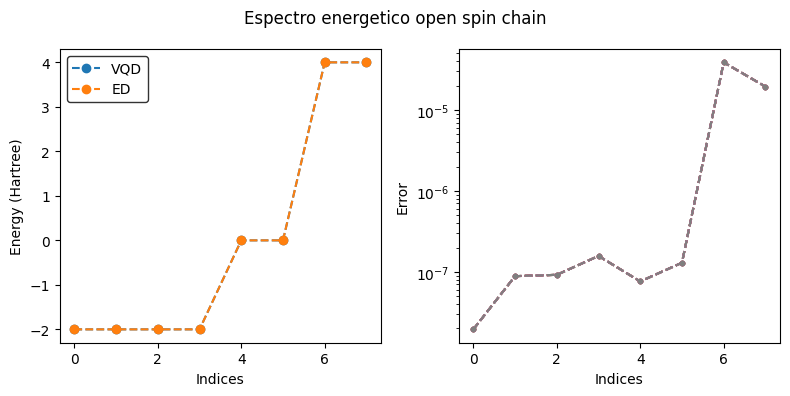

In [6]:
import matplotlib.pyplot as plt

exacto = np.sort(ee1)

fig, ax = plt.subplots(1, 2, figsize=(8,4),)
ax[0].set_xlabel('Indices', fontsize=10)
ax[0].set_ylabel('Energy (Hartree)', fontsize=10)

ax[0].plot([i for i in range(len(energy))], np.sort(energy), "o--", label="VQD")
ax[0].plot([i for i in range(len(ee1))], exacto, "o--", label="ED")
ax[0].legend(loc="upper left", fontsize='medium',frameon=True, edgecolor='k', ncol=1)

ax[1].set_xlabel('Indices', fontsize=10)
ax[1].set_ylabel('Error', fontsize=10)
for i in range(len(energy)):
    ax[1].plot([i for i in range(len(ee1))], [np.abs(float(j)- exacto[k]) for k,j in enumerate( np.sort(energy) )], ".", ls="dashed")
ax[1].set_yscale("log")

fig.suptitle('Espectro energetico open spin chain', fontsize=12)
fig.tight_layout()
plt.show()

In [3]:
params = {
    "sites": 3,
    "spin": 0.5, 
    "pattern": "close",
    "exchange": [1,1,1]
}

spin_chain = vqe_spin(params)
spin_chain.set_group_characteristics()

In [4]:
ansatz_params = {
    "repetitions": 3,
    "base": "default.qubit",
    "backend": None,
    "interface": "autograd",
    "shots": 1000.0,
    "token": None,
    "pattern": "ring"
}

spin_chain.set_device(ansatz_params)
spin_chain.set_node(ansatz_params)

rep = ansatz_params["repetitions"]
number = (spin_chain.qubits)*rep

In [5]:
minimizate_params = {
    "type": "SLSQP",
    "maxiter": 100,
    "tol": 0.000001,
    "number": spin_chain.qubits*3}

# Ejecucion del optimizador para calcular los niveles 
# de energia

optimizer = scipy_optimizer(minimizate_params)
energy, optimum2 = optimizer.VQD(spin_chain.cost_function, spin_chain.overlap_cost_function, 2**spin_chain.qubits)

state  1
state  2
state  3
state  4
state  5
state  6
state  7
state  8


/Users/jnorambu/Documents/vqesimulation/env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


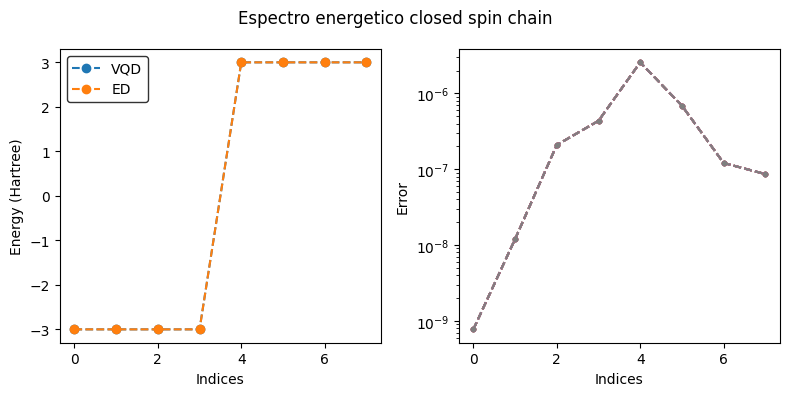

In [6]:
import matplotlib.pyplot as plt

exacto = np.sort(ee2)

fig, ax = plt.subplots(1, 2, figsize=(8,4),)
ax[0].set_xlabel('Indices', fontsize=10)
ax[0].set_ylabel('Energy (Hartree)', fontsize=10)

ax[0].plot([i for i in range(len(energy))], np.sort(energy), "o--", label="VQD")
ax[0].plot([i for i in range(len(ee1))], exacto, "o--", label="ED")
ax[0].legend(loc="upper left", fontsize='medium',frameon=True, edgecolor='k', ncol=1)

ax[1].set_xlabel('Indices', fontsize=10)
ax[1].set_ylabel('Error', fontsize=10)
for i in range(len(energy)):
    ax[1].plot([i for i in range(len(ee2))], [np.abs(float(j)- exacto[k]) for k,j in enumerate( np.sort(energy) )], ".", ls="dashed")
ax[1].set_yscale("log")

fig.suptitle('Espectro energetico closed spin chain', fontsize=12)
fig.tight_layout()
plt.show()

In [7]:
thermal_params = {
    "sites": 3,
    "energy":energy,
    "states": optimum2,
    }
a = quantum_thermal( thermal_params )

In [8]:
minimizate_params = {
    "type": "SLSQP",
    "maxiter": 200,
    "tol": 0.000001,
    "number": 2**3}

optimizer = scipy_optimizer(minimizate_params)

In [36]:
aux2 =[2.586785956694959575e-10, 1505.418942485962398, 4888.063730481204706,
 4768.419711330610491, 3756.51893817699692, 2858.031445202192398,
 2193.4769560994822617, 1716.1855007992088885, 1370.521820272582364,
 1115.4538896950915025, 923.2925367464390183, 775.6033559223575919,
 659.9955406865085858, 567.9952995404733033, 493.6938024989477883,
 432.89010900255197878, 382.54191786166360925, 340.40783796980658746, 
 304.81018038193958403, 274.47479560564449458, 248.42102057527576464,
 225.88478990375538404,
 206.26407212966735157,
 189.07957996583038117,
 173.94609187407960896,
 160.55125262747970769,
 148.6397168120004639,
 138.00115784652852836,
 128.46110691924125753,
 119.87388676252277767,
 112.117112307716416876,
 105.08737478884422377,
 98.696827904714864305,
 92.870467493122179595,
 87.543948718685640056,
 82.66182305832928768,
 78.17610551954831101,
 74.045103411250806476,
 70.232453610877895116,
 66.70632705289815921,
 63.438768114786167646,
 60.405143426013565976,
 57.583679902606449048,
 54.95507590183618045,
 52.50217258436322895,
 50.209675076977746285,
 48.063915006855079958,
 46.05264754765690895,
 44.164877369592061677,
 42.390708888913817682,
 40.72121702037574095,
 39.148335289864564568,
 37.66475869556031433,
 36.26385913932398221,
 34.939611605002588383,
 33.686529552263266406,
 32.49960823551942894,
 31.374274857103887503,
 30.306344629747688633,
 29.291981961782220228,
 28.327666094241893807,
 27.410160616195224767,
 26.536486366410854683,
 25.703897298502334961,
 24.909858945140739344,
 24.152029166535986944,
 23.428240910612352711,
 22.736486748331452876,
 22.074904978433910564,
 21.441767122292815567,
 20.83546665228056101,
 20.2545088166084318,
 19.69750144048227147,
 19.163146598021625077,
 18.65023306204967814,
 18.157629449857123738,
 17.684277992611789738,
 17.229188864429642505,
 16.791435014410424104,
 16.370147451319121716,
 15.964510936185044591,
 15.573760042999639542,
 15.197175552012372394,
 14.834081143927959766,
 14.483840366665358668,
 14.145853849305184239,
 13.8195567404780158905,
 13.504416350773350474,
 13.199929980814639807,
 12.905622918482300614,
 12.621046590400880668,
 12.345776854263532287,
 12.079412419866916139,
 11.8215733878915005926,
 11.5718998965017556635,
 11.330050866771727505,
 11.095702838776768219,
 10.868548890941963081,
 10.648297635911909529,
 10.434672286813272713]

In [33]:
boltz = 8.617333262e-5
t = np.linspace(0.1, 100, 100)
aux = []
for i in t:
    prob = optimizer.Thermal( a.cost_function, 3, i )[1]
    aux1 = np.sum( prob*a.energy*a.energy )
    aux2 = np.sum( prob*a.energy )
    result = (aux1 - aux2**2)/(i*i*boltz)
    aux.append( result )

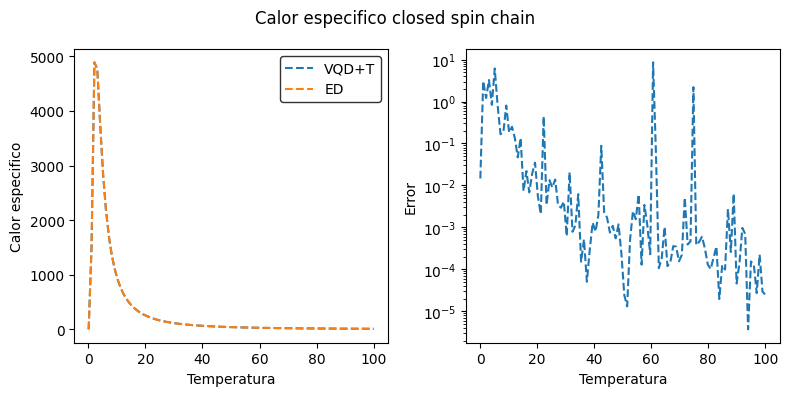

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(8,4),)
ax[0].set_xlabel('Temperatura', fontsize=10)
ax[0].set_ylabel('Calor especifico', fontsize=10)

ax[0].plot(np.linspace(0.1, 100, 100), np.array(aux), "--", label="VQD+T")
ax[0].plot(np.linspace(0.1, 100, 100), np.array(aux2), "--", label="ED")
ax[0].legend(loc="upper right", fontsize='medium',frameon=True, edgecolor='k', ncol=1)

ax[1].set_xlabel('Temperatura', fontsize=10)
ax[1].set_ylabel('Error', fontsize=10)
ax[1].plot(np.linspace(0.1, 100, 100), [np.abs(aux[i] - aux2[i]) for i in range(100)], "--")
ax[1].set_yscale("log")

fig.suptitle('Calor especifico closed spin chain', fontsize=12)
fig.tight_layout()
plt.show()